# 해시코드 질문태그 빈도 시각화
- [해시코드](https://hashcode.co.kr)에서 어떤 태그의 질문이 많이 올라오는 지 시각화

In [7]:
user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
import requests
from bs4 import BeautifulSoup as BS


### 하나의 페이지에서만 불러오기

In [8]:
res = requests.get("https://hashcode.co.kr")
bs = BS(res.text, "html.parser")

ul_tags = bs.find_all("ul", "question-tags")
for ul in ul_tags:
    li_tags = ul.find_all("li")
    for li in li_tags:
        print(li.text.strip())

flutter
html
css
javascript
android-studio
flutter
tensorflow
python
ssl
letsencrypt
nginx
load-balancing
aws
python
c
algorithm
front-end
operator
coding
tensorflow
css
html
crawling
warning
array
key
line
php
sql
java
xcode
software_development
developer
java
wallpaper
javascript
json
python
math
data
aws
model
javascript
naver-map
c++
python
error
api
c++
typescript
decorator
linux
yum
python
c++
openai
python
python
data-structure
algorithm
python
python
if-else
java
coding-test
project
language


### 총 10페이지에서 불러오기


In [12]:
URL = "https://hashcode.co.kr/?page={i}"

tags = []
for i in range(1, 11):
    res = requests.get(URL.format(i=i), user_agent)
    bs = BS(res.text, "html.parser")

    ul_tags = bs.find_all("ul", "question-tags")
    for ul in ul_tags:
        li_tags = ul.find_all("li")
        for li in li_tags:
            tags.append(li.text.strip())

print(tags)

['flutter', 'html', 'css', 'javascript', 'android-studio', 'flutter', 'tensorflow', 'python', 'ssl', 'letsencrypt', 'nginx', 'load-balancing', 'aws', 'python', 'c', 'algorithm', 'front-end', 'operator', 'coding', 'tensorflow', 'css', 'html', 'crawling', 'warning', 'array', 'key', 'line', 'php', 'sql', 'java', 'xcode', 'software_development', 'developer', 'java', 'wallpaper', 'javascript', 'json', 'python', 'math', 'data', 'aws', 'model', 'javascript', 'naver-map', 'c++', 'python', 'error', 'api', 'c++', 'typescript', 'decorator', 'linux', 'yum', 'python', 'c++', 'openai', 'python', 'python', 'data-structure', 'algorithm', 'python', 'python', 'if-else', 'java', 'coding-test', 'project', 'language', 'language', 'coding-test', 'error', 'python', 'string', 'vim', 'coding-test', 'javascript', 'java', 'html5', 'html', 'html', 'java', 'coding-test', 'algorithm', 'html5', 'html', 'c', 'c#', 'xaml', 'instagram', 'c++', 'javafx', 'python', 'web-crawling', 'java', 'game', 'c#', 'payment-gateway',

In [16]:
### Counter를 이용하여 dict 형식으로
from collections import Counter
tag_counter = Counter(tags)
print(tag_counter)
print((tag_counter.keys()))
print(tag_counter.values())

Counter({'python': 168, 'c': 45, 'java': 43, 'c++': 25, 'javascript': 23, 'html': 16, 'coding-test': 16, 'pandas': 15, 'algorithm': 10, 'error': 10, 'dataframe': 10, 'css': 9, 'c#': 9, 'class': 8, 'python3': 8, 'crawling': 6, 'spring': 6, 'node.js': 6, 'beautifulsoup': 6, 'arduino': 5, 'react': 5, 'for': 5, 'coding': 4, 'array': 4, 'data-structure': 4, 'string': 4, 'excel': 4, 'gui': 4, 'opencv': 4, 'tkinter': 4, 'flutter': 3, 'operator': 3, 'data': 3, 'linux': 3, 'html5': 3, 'web-crawling': 3, 'game': 3, 'android': 3, 'mfc': 3, 'global-variable': 3, 'vscode': 3, 'django': 3, 'scanf': 3, 'windows': 3, 'numpy': 3, 'import': 3, 'selenium-webdrive': 3, 'recursive': 3, 'dictionary': 3, 'image': 3, 'tensorflow': 2, 'nginx': 2, 'aws': 2, 'front-end': 2, 'sql': 2, 'xcode': 2, 'software_development': 2, 'api': 2, 'decorator': 2, 'openai': 2, 'language': 2, 'vim': 2, 'javafx': 2, 'web': 2, 'logistic-regression': 2, 'stack': 2, 'git': 2, 'local-variable': 2, 'r': 2, 'c++표준': 2, 'mssql': 2, 'code

In [21]:
### 빈도수가 높은 10개만 남겨놓기
common_10 = tag_counter.most_common(10)
print(common_10)
common_dict = {key:value for key, value in common_10}
print(common_dict)

[('python', 168), ('c', 45), ('java', 43), ('c++', 25), ('javascript', 23), ('html', 16), ('coding-test', 16), ('pandas', 15), ('algorithm', 10), ('error', 10)]
{'python': 168, 'c': 45, 'java': 43, 'c++': 25, 'javascript': 23, 'html': 16, 'coding-test': 16, 'pandas': 15, 'algorithm': 10, 'error': 10}


<Axes: title={'center': 'Frequency of question in Hashcode'}, xlabel='Tags', ylabel='Frequency'>

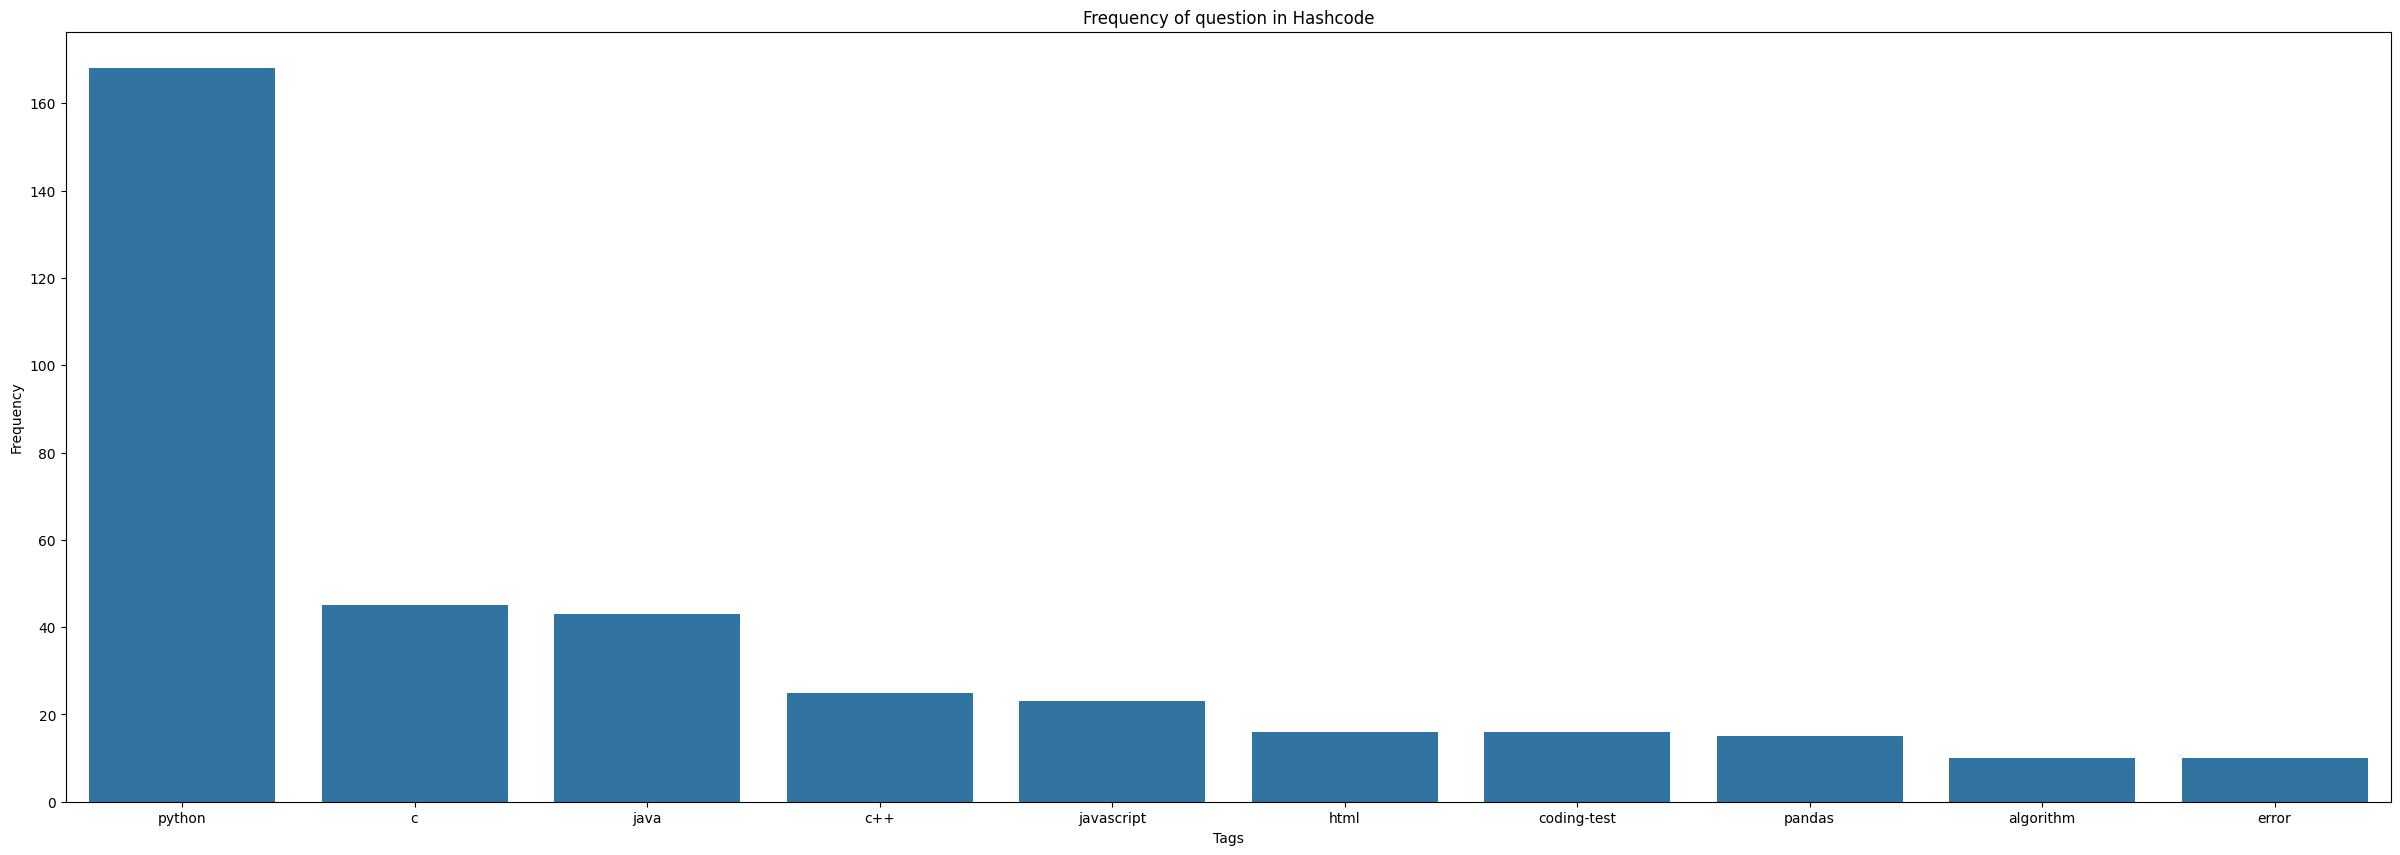

In [28]:
### 막대그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.title("Frequency of question in Hashcode")
plt.xlabel("Tags")
plt.ylabel("Frequency")
sns.barplot(x=common_dict.keys(), y=common_dict.values())